In [1]:
import numpy as np
import pandas as pd
import plottools
import matplotlib.pyplot as plt

In [2]:
DataFrame = pd.read_csv('Dataset.csv', index_col= 0)
DataFrame.head()

,AMSTEOE,DAXINDX,FRCAC40,FTSE100,HNGKNGI,PDOWA,GALLS,COMP
0,261.36,1411.28,1482.89,2371.0,3225.97,23755.89,387.17,307.52
1,262.02,1419.76,1490.42,2382.0,3207.21,24102.98,391.44,308.37
2,263.32,1431.03,1490.42,2386.6,3216.11,24118.01,393.99,307.63
3,264.98,1440.47,1490.42,2403.0,3253.42,23931.52,390.23,310.68
4,264.50,1462.16,1490.42,2419.2,3262.30,23969.76,395.71,310.42


In [3]:
Train_df =  DataFrame[['AMSTEOE']]
Train_Df = Train_df.values

In [4]:
train_size = int(len(Train_Df)*0.6)
valid_size = int(len(Train_Df)*0.2)
test_size = len(Train_Df)-train_size-valid_size
print(train_size, valid_size, test_size)

(1640, 546, 548)


In [5]:
train, valid, test = Train_Df[0:train_size], Train_Df[train_size:train_size+valid_size,:], Train_Df[train_size+valid_size:len(Train_Df)]

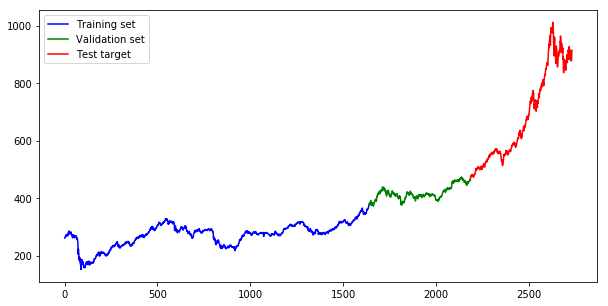

In [6]:
plt.figure(figsize=(10,5))
ax = plt.plot(train, label = 'Training set', color = 'blue')
#plt.plot()
plt.plot([i for i in range(train_size, train_size+valid_size)], valid, label = 'Validation set', color = 'green')
plt.plot([i for i in range(train_size+valid_size, len(Train_Df))],test, label ='Test target', color = 'red')
plt.legend()
plt.show()

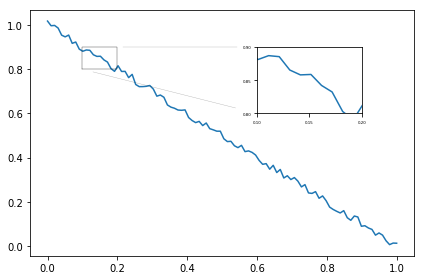

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import plottools
# >>>
fig,ax = plt.subplots()
x = np.linspace(0,1,100)
y = 1-x + 0.02*(2*np.random.random(len(x))-1)
ax.plot(x,y)
ax_zoom = plottools.zoom_axes(fig,ax,[0.1,0.2],[0.8,0.9],[0.6,0.9],[0.6,0.9])
ax_zoom.plot(x,y)
plt.show()

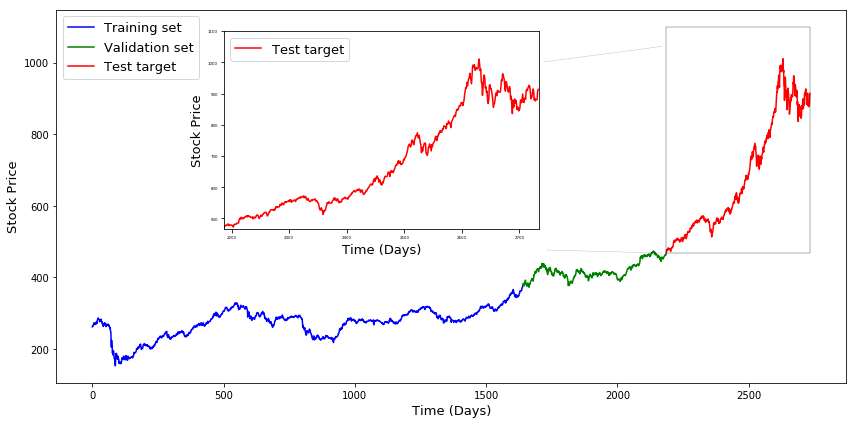

In [8]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(train, label = 'Training set', color = 'blue')
plt.plot([i for i in range(train_size, train_size+valid_size)], valid, label = 'Validation set', color = 'green')
plt.plot([i for i in range(train_size+valid_size, len(Train_Df))],test, label ='Test target', color = 'red')
plt.xlabel('Time (Days)', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.legend(fontsize = 13)
ax_zoom = plottools.zoom_axes(fig,ax,[2186,2734],[467.37,1100],[500,1700],[500,1000])
ax_zoom.plot([i for i in range(train_size+valid_size, len(Train_Df))],test, label ='Test target', color = 'red')
plt.xlabel('Time (Days)', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.legend(fontsize = 13)
plt.savefig('Train-Valid-Test_split.eps', format='eps', dpi=1000)
plt.show()

In [9]:
combined = pd.read_csv('Pred_Data2.csv', index_col = 0)
combined.head()

,LSTM,RNN,GRU,Actual Price
0,463.32245,459.68304,458.75820,475.62
1,468.94680,460.88626,463.13934,473.85
2,466.49890,464.06543,465.04175,477.22
3,471.03726,467.73907,467.10873,478.11
4,470.81177,471.07846,467.99146,477.77


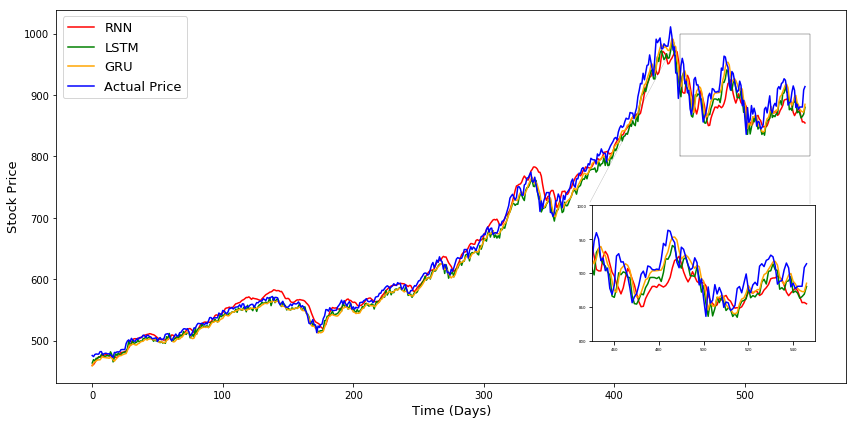

In [10]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(combined['RNN'],label = 'RNN', color = 'red')
ax.plot(combined['LSTM'],label = 'LSTM', color = 'green')
ax.plot(combined['GRU'], color = 'orange')
ax.plot(combined['Actual Price'], label = 'Actual Price', color = 'blue')
plt.xlabel('Time (Days)',fontsize = 13)
plt.ylabel('Stock Price',fontsize = 13)
plt.legend(fontsize = 13)
ax_zoom = plottools.zoom_axes(fig,ax,[450,550],[800,1000],[380,550],[500,720])
ax_zoom.plot(combined['RNN'][450:], color = 'red')
ax_zoom.plot(combined['LSTM'][450:], color = 'green')
ax_zoom.plot(combined['GRU'][450:], color = 'orange')
ax_zoom.plot(combined['Actual Price'][450:], color = 'blue')
plt.savefig('Combined2.eps', format='eps', dpi =1000)
plt.show()

In [11]:
average = pd.read_csv('Average.csv', index_col = 0)
average.head()

,0
0,460.58790
1,464.32413
2,465.20203
3,468.62840
4,469.96057


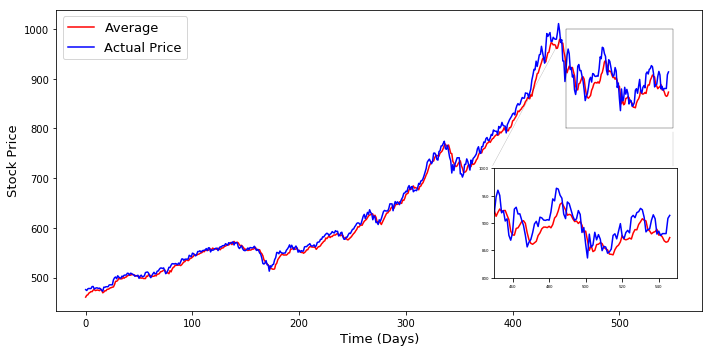

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(average,label = 'Average', color = 'red')

ax.plot(combined['Actual Price'], label = 'Actual Price', color = 'blue')
plt.xlabel('Time (Days)',fontsize = 13)
plt.ylabel('Stock Price',fontsize = 13)
plt.legend(fontsize = 13)
ax_zoom = plottools.zoom_axes(fig,ax,[450,550],[800,1000],[380,550],[500,720])
ax_zoom.plot(average[450:], color = 'red')
ax_zoom.plot(combined['Actual Price'][450:], color = 'blue')
plt.savefig('Average2a.eps', format='eps', dpi =1000)
plt.show()